## BEEM011 Exercise 3: Week 4

Amy Binner and Eva Poen

Answers

## Useful R code

INSTALLING A PACKAGE AND ADDING TO LIBRARY

install.packages(“AER”)  # to install a package for the first time

library(AER) # to load a package into the notebook

data(“CASchools”) # loading the CASchools dataset

SCATTERPLOT

plot(y~x, main = "example scatterplot", xlab="x", ylab="y") # y on the y-axis, x on the x-axis, main is the title, xlab and ylab                                                             # are axis labels

LINEAR REGRESSION

reg <- lm(y~x,data =mydata) # lm( ) is the linear regression model function, y$\text{~x}$ means variable y regressed on variable x

summary(reg) # Displays summary output from the regression object reg

PLOTTING RESIDUALS

plot(reg$residuals) # plots the residuals from the regression stored in object reg


# Question 1 a)

Install and load the “AER” package to load the CASchools dataset containing data on test performance, school characteristics and student demographic backgrounds for 420 school districts in California. 

Plot the average reading score (read) on the average math score (math). 



  There is a binary version available but the source version is later:
    binary source needs_compilation
AER  1.2-9 1.2-10             FALSE



installing the source package 'AER'



NULL

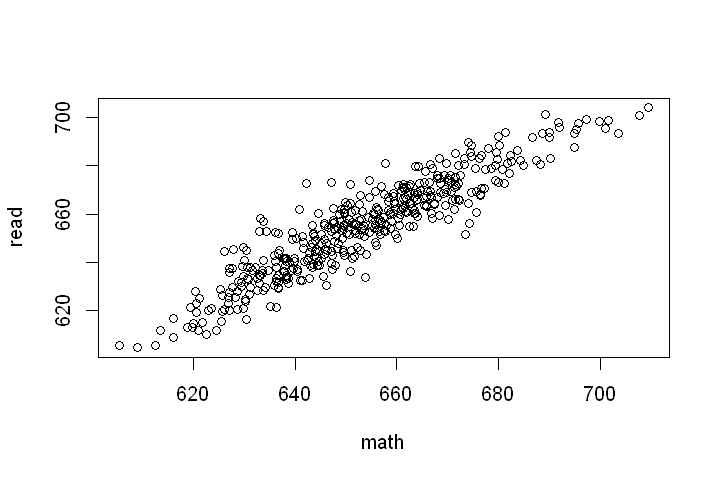

In [5]:
## Edit the code below 
# Header: Exercise 3 
# Author: 
# Date:
# Candidate number:

# install.packages("AER")
library(AER)
# Load the data - the name of the dataset when loaded into R is CASchools
# use this name in any subsequent commands
data("CASchools")

# Set the plot size
# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=4)

# Plot the average reading score (read) on the average math score (math).
# Enter the missing code below
plot1 <- plot(read~math, data = CASchools)
plot1

What do you observe?

#### Write your answer here (double click to edit)

It seems that Math and Reading Test Scores are strongly positively correlated. Adding a 45-degree line (where the intercept is zero and the slope is one) across the data points seems to suggest the relationship is close to unity; that is, a one-unit increase in Math Test Score is associated with about 1 unit increase in Read Test Score.

## 1 b)	

Run a regression of the average reading score (read) on the average math score (math). 

What values for the slope and the intercept would you expect? 

In [6]:
# Run a regression of read on math
reg1 <- lm(read~math, data=CASchools)

summary(reg1)


Call:
lm(formula = read ~ math, data = CASchools)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4177  -5.9684  -0.3576   4.9779  28.8554 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.47397   13.19783   0.642    0.521    
math         0.98952    0.02019  49.005   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.752 on 418 degrees of freedom
Multiple R-squared:  0.8517,	Adjusted R-squared:  0.8514 
F-statistic:  2402 on 1 and 418 DF,  p-value: < 2.2e-16


In [7]:
# Make this look prettier with stargazer
library(stargazer)
stargazer(reg1, type="text", digits = 2, report=("vc*sp"))


                        Dependent variable:    
                    ---------------------------
                               read            
-----------------------------------------------
math                          0.99***          
                              (0.02)           
                             p = 0.00          
                                               
Constant                       8.47            
                              (13.20)          
                             p = 0.53          
                                               
-----------------------------------------------
Observations                    420            
R2                             0.85            
Adjusted R2                    0.85            
Residual Std. Error       7.75 (df = 418)      
F Statistic          2,401.51*** (df = 1; 418) 
Note:               *p<0.1; **p<0.05; ***p<0.01


# 1 c)

Interpret the coefficient on math from your output

#### Write your interpretation here (double click to edit)
You should comment on the sign, magnitude and units 

On average, it would seem plausible, a priori, that schools which score high on the math score would also do well in the reading score. To be exact, the parameter estimates suggest that a 1 point increase in Math Test Scores is associated with 0.99 point increase in Reading Test Scores. Perhaps an underlying variable, such as genes, parental interest, or the quality of teachers, is driving results in both. (we will get back to this issue in Week 5 when we discuss omitted variable bias in causal inference). The relationship is close to the 45-degree line. 

## 1 d)

Interpret the regression $R^2$ and the SER. 

What are their units of measurement?

#### Write your answer here

R squared shows that 85 percent of the variation in the reading score is explained by our model.

The SER or prediction error is 7.752, which implies that, on the average, our predicted Reading Test Scores made by using Math Reading Scores as the sole regressor will be off by 7.752 points. Notice that the unit of measurement is the same as the units of the dependent variable, which is this case is that Standardized Test Score points. 


## 1 e)

Plot the residuals. 

NULL

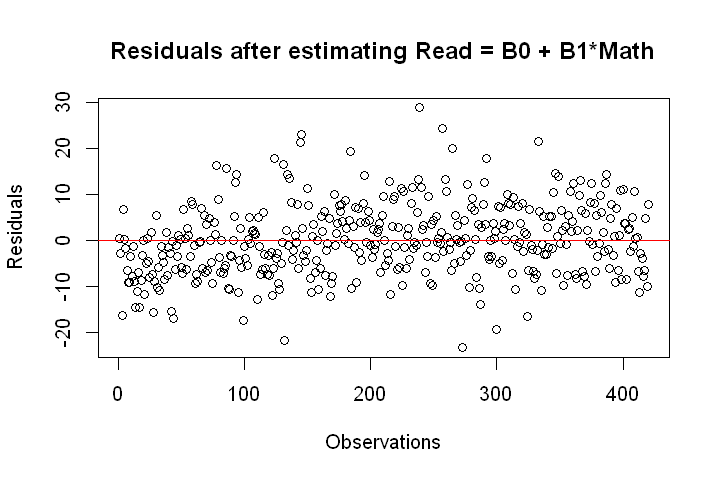

In [8]:
## Plot the residuals

plot2 <- plot(reg1$residuals, main = "Residuals after estimating Read = B0 + B1*Math", xlab = "Observations", ylab = "Residuals") 

# Add a horizontal line at y = 0
abline(h=0, col="red")

## DO NOT EDIT
plot2

What do you observe? How do they relate to SER? 

#### Write your answer here

Note that the $ SER =\sqrt{{1\over n-2} \Sigma_{i=1}^n \hat{\mu_i}^2}$. Thus, when residuals are generally small, the SER is small. One can verify that, relative to the dependent variable, the residuals are very low (relative to average Reading Test Scores) using the plot above. 

## Question 2 a)

The neoclassical growth model predicts that for identical savings rates and population growth rates, countries should converge to the same per capita income level. This is referred to as the convergence hypothesis. One way to test for the presence of convergence is to compare the growth rates over time to the initial starting level.

If you regressed the average growth rate over a time period (1960-1990) on the initial level of per capita income, what would the sign of the slope have to be to indicate this type of convergence?


In [8]:
## Choose one option as your answer and delete the others

sign <- 'positive'
sign <- 'negative'
sign <- 'zero'


#### Enter your explanation here

You would require a negative sign. Countries that are far ahead of others at the beginning of the period would have to grow relatively slower for the others to catch up. This represents unconditional convergence, whereas the neoclassical growth model predicts conditional convergence, i.e., there will only be convergence if countries have identical savings, population growth rates, and production technology.

## 2b)

b.	The results of the regression for 1countries were as follows:

  $\hat{g}_{6090} = 0.019 – 0.0006 × RelProd60 , 	R^2 = 0.00007, SER = 0.016,$

where $g_{6090}$ is the average annual growth rate of GDP per worker for the 1960-1990 sample period, and RelProd60 is GDP per worker relative to the United States in 1960.

Interpret the results. Is there any evidence of unconditional convergence between the countries of the world? 

#### Write your interpretation here

An increase in 10 percentage points in RelProd60 results in a decrease of 0.00006 in the growth rate from 1960 to 1990, i.e., countries that were further ahead in 1960, do grow by less. There are probably some countries in the sample that have a value of RelProd60 close to zero (China, Uganda, Togo, Guinea) and you would expect these countries to grow roughly by 2 percent per year over the sample period. The regression R2 indicates that the regression has virtually no explanatory power. The result is not surprising given that there are not many theories that predict unconditional convergence between the countries of the world. (For a brief summary of the convergence theory, see https://opentextbc.ca/principlesofeconomics/chapter/20-4-economic-convergence/) 

## 2 c)

c.	You decide to restrict yourself to the 24 OECD countries in the sample. This changes your regression output as follows:

 $ \hat{g}_{6090} = 0.048  – 0.0404 RelProd60 , 	R2 = 0.82 , SER  = 0.0046$

How does this result affect your conclusions from above?



#### Enter your answer here

Judging by the size of the slope coefficient, there is strong evidence of unconditional convergence for the OECD countries. The regression $R^2$ is quite high, given that there is only a single explanatory variable in the regression. However, since we do not know the sampling distribution of the estimator in this case, we cannot conduct inference. (In other words, you cannot say whether your estimated parameter is statistically significant or not). 

In [ ]:
## DO NOT EDIT
# This section formats your answers for marking
answers = c(plot1, plot2, reg1, sign)